# ML models


In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import Workbook


df = pd.read_excel('merged_data.xlsx')
viz_df = pd.read_csv('cleanec_crime3')
ml_df = pd.read_csv('cleaned_crime.csv')
ml_df2 = pd.read_csv('cleaned_crime2.csv')


In [12]:
X = ml_df.drop('Criminality',axis = 1) # Criminality is variable to predict
y = ml_df['Criminality']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=32)
# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train)
y_pred = regression_model.predict(X_test)
y_pred

acc = regression_model.score(X_test_scaled, y_test)
print(acc)

#print(classification_report(y_test,y_pred))



# Check for overfitting/underfitting

y_pred_train = regression_model.predict(X_train_scaled)
y_pred_test = regression_model.predict(X_test_scaled)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Printing the MSE for both training and testing sets
print("MSE for Training Set:", mse_train)
print("MSE for Testing Set:", mse_test)

# We know there is not very much overfitting becauase the MSE for the training set is higher than the MSE for the testing set, and no significant difference.

0.8263065315201373
MSE for Training Set: 3.284035252702713e-29
MSE for Testing Set: 0.4055421796337513


C:\Users\aga20\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
#KNN ML Model

X = ml_df.drop('Criminality',axis = 1)
y = ml_df['Criminality']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=32)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k = 1


knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train_scaled, y_train)


y_pred = knn.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(mse)


1.0195310344827586


# Data Visualization


Text(0.5, 1.0, 'Relationship between Criminality and GDP per capita')

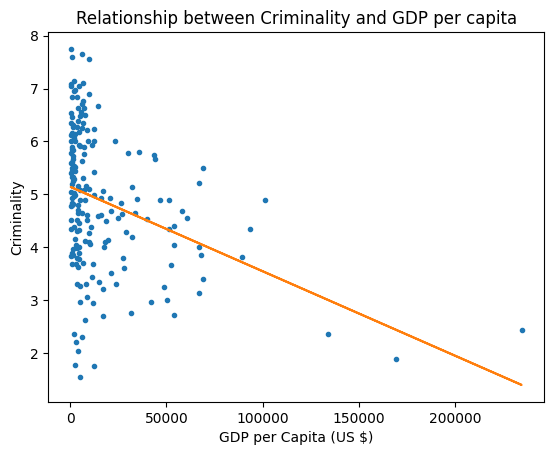

In [20]:
import matplotlib.pyplot as plt

# Graph to compare GDP with Criminality


plt.plot(viz_df['GDP_per_capita'],viz_df['Criminality'],'.')

z = np.polyfit(viz_df['GDP_per_capita'],viz_df['Criminality'], 1) # Trendline
p = np.poly1d(z)
plt.plot(viz_df['GDP_per_capita'], p(viz_df['GDP_per_capita']))

plt.xlabel('GDP per Capita (US $)') # Name axis
plt.ylabel('Criminality')
plt.title('Relationship between Criminality and GDP per capita')

In [ ]:
non_region_df = viz_df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(non_region_df.corr(),annot=True)

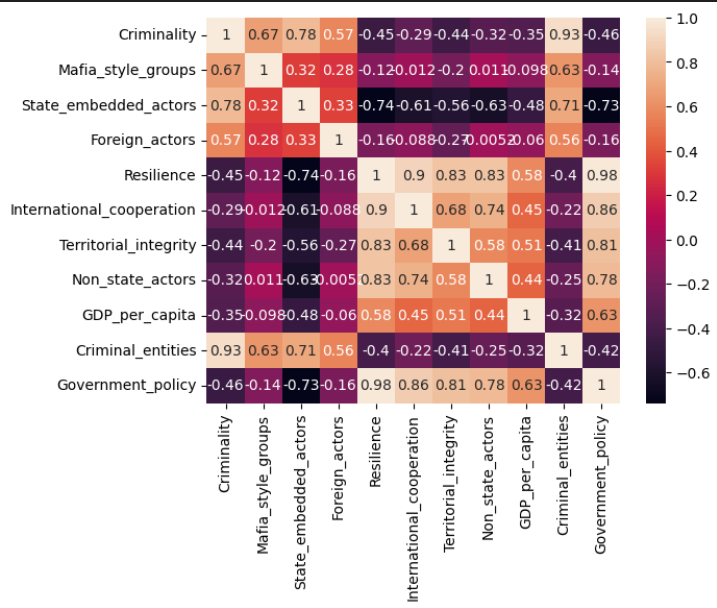![corr.png](attachment:corr.png)

Text(0, 0.5, 'Average Criminality Score')

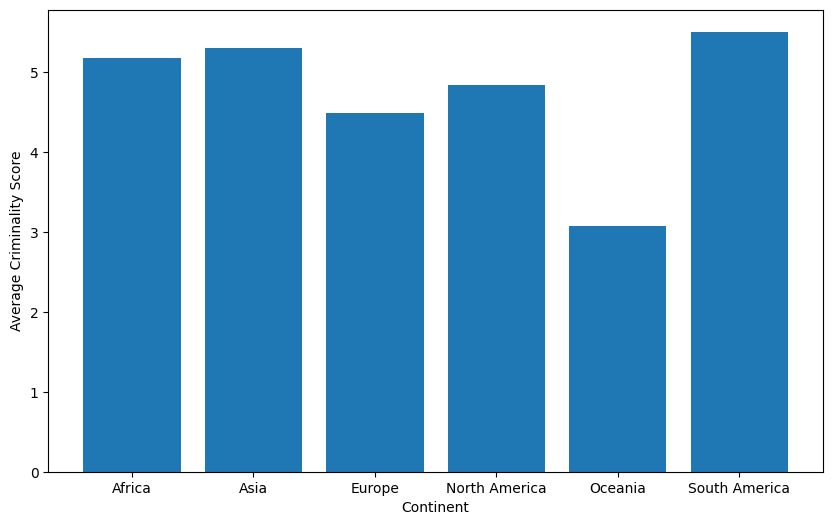

In [24]:
avg_criminality_by_continent = df.groupby('Continent')['Criminality'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(avg_criminality_by_continent['Continent'], avg_criminality_by_continent['Criminality'])
plt.xlabel('Continent')
plt.ylabel('Average Criminality Score')